In [133]:
from sklearn.datasets import load_diabetes
import numpy as np
diabetes = load_diabetes()
print(type(diabetes))

<class 'sklearn.utils._bunch.Bunch'>


In [134]:
######## (1) 데이터 가져오기 ############
df_x = diabetes.data
df_y = diabetes.target

In [135]:
############# 모델에 입력할 데이터 x,y 준비하기 #############
df_x = np.array(df_x)
df_y = np.array(df_y)

In [136]:
######### train 데이터와 test데이터로 분리하기 ########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [137]:
# (5) 모델 준비하기
# 가중치(w)와 편향(b)를 초기화
# 입력 데이터 개수에 맞게 가중치 벡터의 크기를 설정합니다.
n_features = df_x.shape[1]
print(n_features)
w = np.zeros(n_features)
b = 0

# 선형 회귀 모델 함수 정의
def model(X, w, b):
    return np.dot(X, w) + b

10


In [138]:
# (6) 손실함수 loss 정의하기
# 손실함수를 MSE(Mean Squared Error)로 정의
def compute_loss(X, y, w, b):
    m = len(y)
    predictions = model(X, w, b)
    loss = (1 / m) * np.sum((predictions - y) ** 2)
    return loss

In [139]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def compute_gradient(X, y, w, b):
    m = len(y)
    predictions = model(X, w, b)
    error = predictions - y

    # 가중치에 대한 기울기
    dj_dw = (1 / m) * np.dot(X.T, error)

    # 편향에 대한 기울기
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

In [140]:
# 하이퍼 파라미터 탐색을 위한 학습률 리스트
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1,1.3,1.5,1.7,2]
n_iterations = 1000  # 반복 횟수
results = {}  # 학습률별 결과 저장

# 모델 학습 함수 정의
def train_model(X_train, y_train, learning_rate, n_iterations):
    n_features = X_train.shape[1]
    w = np.zeros(n_features)
    b = 0.0

    for i in range(n_iterations):
        dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        if i % 100 == 0:
            loss = compute_loss(X_train, y_train, w, b)
            print(f"Learning Rate {learning_rate} - Iteration {i}: Loss = {loss:.4f}")

    final_loss = compute_loss(X_train, y_train, w, b)
    return final_loss, w, b

In [141]:
# 여러 학습률에 대해 모델 학습 수행
for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    final_loss, final_w, final_b = train_model(X_train, y_train, lr, n_iterations)
    results[lr] = (final_loss, final_w, final_b)


Training model with learning rate: 0.0001
Learning Rate 0.0001 - Iteration 0: Loss = 29706.5913
Learning Rate 0.0001 - Iteration 100: Loss = 29238.1715
Learning Rate 0.0001 - Iteration 200: Loss = 28779.0198
Learning Rate 0.0001 - Iteration 300: Loss = 28328.9526
Learning Rate 0.0001 - Iteration 400: Loss = 27887.7901
Learning Rate 0.0001 - Iteration 500: Loss = 27455.3558
Learning Rate 0.0001 - Iteration 600: Loss = 27031.4770
Learning Rate 0.0001 - Iteration 700: Loss = 26615.9843
Learning Rate 0.0001 - Iteration 800: Loss = 26208.7116
Learning Rate 0.0001 - Iteration 900: Loss = 25809.4960

Training model with learning rate: 0.001
Learning Rate 0.001 - Iteration 0: Loss = 29664.0279
Learning Rate 0.001 - Iteration 100: Loss = 25381.5845
Learning Rate 0.001 - Iteration 200: Loss = 21875.0588
Learning Rate 0.001 - Iteration 300: Loss = 19003.7366
Learning Rate 0.001 - Iteration 400: Loss = 16652.4226
Learning Rate 0.001 - Iteration 500: Loss = 14726.8129
Learning Rate 0.001 - Iterati

In [142]:
# 최적의 학습률 찾기
optimal_lr = min(results, key=lambda x: results[x][0])
optimal_loss, optimal_w, optimal_b = results[optimal_lr]

print(f"\nOptimal Learning Rate: {optimal_lr}")
print(f"Final Loss with Optimal Learning Rate: {optimal_loss:.4f}")
print(optimal_w)
print(optimal_b)


Optimal Learning Rate: 1.7
Final Loss with Optimal Learning Rate: 2899.2850
[  39.54471031 -232.98356907  545.08686511  338.65564082  -92.12649473
 -128.67513916 -217.66786727  147.09857814  404.9006651    79.6866516 ]
151.30827869478333


In [143]:
train_predictions = np.dot(X_train, optimal_w) + optimal_b
train_mse = (1 / len(y_train)) * np.sum((train_predictions - y_train) ** 2)
print(f"Training MSE with Optimal Learning Rate: {train_mse:.4f}")

Training MSE with Optimal Learning Rate: 2899.2850


In [144]:
# (10) Test 데이터에 대한 성능 확인하기
# 최적의 학습률에 대한 가중치와 편향 사용
y_test_pred = model(X_test, optimal_w, optimal_b)
test_loss = compute_loss(X_test, y_test, optimal_w, optimal_b)
print(f"Test Loss with Optimal Learning Rate: {test_loss:.4f}")

Test Loss with Optimal Learning Rate: 2877.7009


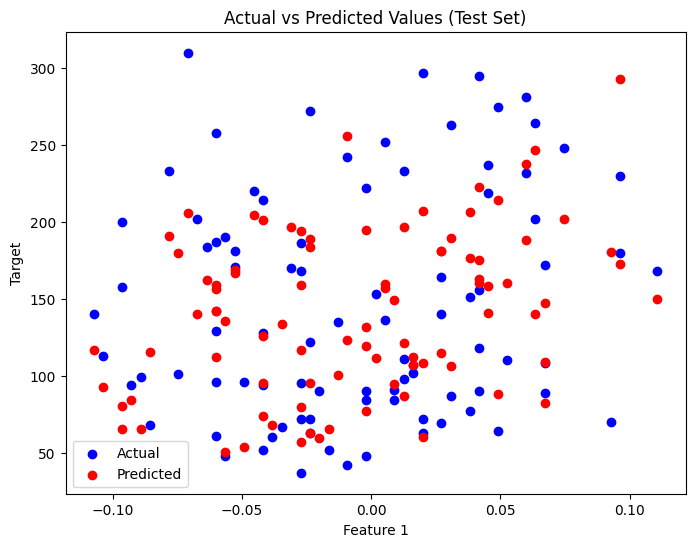

In [ ]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_test_pred, color='red', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()